<a href="https://colab.research.google.com/github/mirpouya/Introduction-to-PyTorch/blob/main/PyTorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensors are multi dimensional matrices desiged to perform well on GPU

In [1]:
import torch

**<h2> Torch Tensors </h2>**

In [2]:
# 1-d tesnsor

a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [3]:
# 2-d tensor

b = torch.tensor([[1,2,3],[2,2,2],[3,3,3]])
b

tensor([[1, 2, 3],
        [2, 2, 2],
        [3, 3, 3]])

In [4]:
# size and shape

print(f"a shape is : {a.shape}")
print(f"b shape is : {b.shape}")
print(f"\na size is : {a.size()}")
print(f"b size is : {b.size()}")

a shape is : torch.Size([3])
b shape is : torch.Size([3, 3])

a size is : torch.Size([3])
b size is : torch.Size([3, 3])


In [5]:
c = torch.tensor([1.1, 2.314, 4])
c

tensor([1.1000, 2.3140, 4.0000])

In [6]:
# float tensor

c = torch.FloatTensor([1.1, 2.314, 4])
c

tensor([1.1000, 2.3140, 4.0000])

In [7]:
# mean of tensor

c.mean()

tensor(2.4713)

In [9]:
# not all types of tensors have mean() method
b.mean()

RuntimeError: ignored

In [10]:
# std of tensor

c.std()

tensor(1.4564)

Opposed to SkLearn, there's **NO** predefined Machine Learning model in PyTroch. <br> **NO** fit or predict functions <br>

**<h2> Linear Regression in PyTorch <h2>**

<ol>
  <li>How do we build the model?</li>
  <li>How do we fit the model (Important part)</li>
  <li>How do we make prediction?</li>
</ol>

The first step in training a model is to define a **LOSS** and optimize it
Loss and optimizer

In [11]:
# imports

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

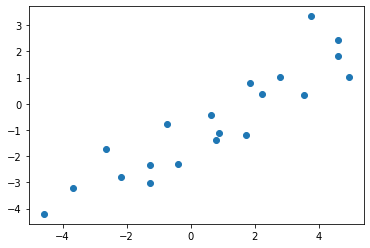

In [12]:
# generate synthetic data

n = 20

X = np.random.random(n)*10 -5

# a line using X with some noise
y = 0.5*X - 1 + np.random.randn(n)

# visualizing 
plt.scatter(X, y)

**<h3> Create Linear Regression Model </h3>**

In [22]:
# a linear neuron with one input and one output

model = nn.Linear(1, 1)

<h3> Loss and Optimizer </h3>

In [23]:
criterion = nn.MSELoss()  # calculate loss with Mean Squared Error criterion

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # stochastic gradient descent 

In [24]:
# in ML problems shape of the data has to be : (no. samples, no. dimensions)

X = X.reshape(n, 1)   # numpy array of X is of shape (n,)
y = y.reshape(n, 1)

In [25]:
"""
one thing to note is, PyTorch is very sensitive about data types, for example it does not operate on float32 and float64 together.
Therefore data types must be the same.
Moreover, PyTorch does not work with np.arrays, all numpy arrays must be transformed to torch.tensors
"""

# transform np.array to torch.tensor + making all data types alike

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

In [26]:
type(inputs)

torch.Tensor

**<h3> Training the model </h3>**

In [27]:
n_epoch = 30
losses = []    # save losses in a list to visualize them and observe the descending pattern

for iter in range(n_epoch):
  # PyTorch accumulates gradients, therefore in each epoch it is necessary to reset gradients
  optimizer.zero_grad()

  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  """
   saving loss in this iteration for plotting later
   we want to get the loss from PyTorch land to python land
   since matplotlib.pyplot is in numpy and pandas realm
   item is a single tensor number not an array therefore we use .item() instead of np.array()
   loss is a tensor
  """
  losses.append(loss.item())

  # backward to calculate grads and optimize weights
  loss.backward()
  # do one step of gradient descend
  optimizer.step()  

  print(f"Epoch {iter+1}/{n_epoch}, Loss: {loss.item(): .4f}")

Epoch 1/30, Loss:  20.8743
Epoch 2/30, Loss:  10.3048
Epoch 3/30, Loss:  5.4167
Epoch 4/30, Loss:  3.1020
Epoch 5/30, Loss:  1.9718
Epoch 6/30, Loss:  1.3990
Epoch 7/30, Loss:  1.0962
Epoch 8/30, Loss:  0.9289
Epoch 9/30, Loss:  0.8325
Epoch 10/30, Loss:  0.7748
Epoch 11/30, Loss:  0.7392
Epoch 12/30, Loss:  0.7168
Epoch 13/30, Loss:  0.7024
Epoch 14/30, Loss:  0.6930
Epoch 15/30, Loss:  0.6869
Epoch 16/30, Loss:  0.6828
Epoch 17/30, Loss:  0.6802
Epoch 18/30, Loss:  0.6784
Epoch 19/30, Loss:  0.6772
Epoch 20/30, Loss:  0.6764
Epoch 21/30, Loss:  0.6759
Epoch 22/30, Loss:  0.6756
Epoch 23/30, Loss:  0.6753
Epoch 24/30, Loss:  0.6752
Epoch 25/30, Loss:  0.6751
Epoch 26/30, Loss:  0.6750
Epoch 27/30, Loss:  0.6749
Epoch 28/30, Loss:  0.6749
Epoch 29/30, Loss:  0.6749
Epoch 30/30, Loss:  0.6749


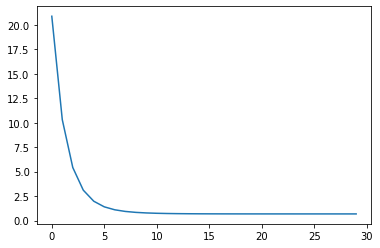

In [28]:
# plot losses
plt.plot(losses)